First few rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
First few rows after PCA transformation:
        PC1       PC2 species
0 -2.264703  0.480027  setosa
1 -2.080961 -0.674134  setosa
2 -2.364229 -0.341908  setosa
3 -2.299384 -0.597395  setosa
4 -2.389842  0.646835  setosa
Explained variance by each principal component: [0.72962445 0.22850762]
Total variance explained by the two components: 0.9581320720000164


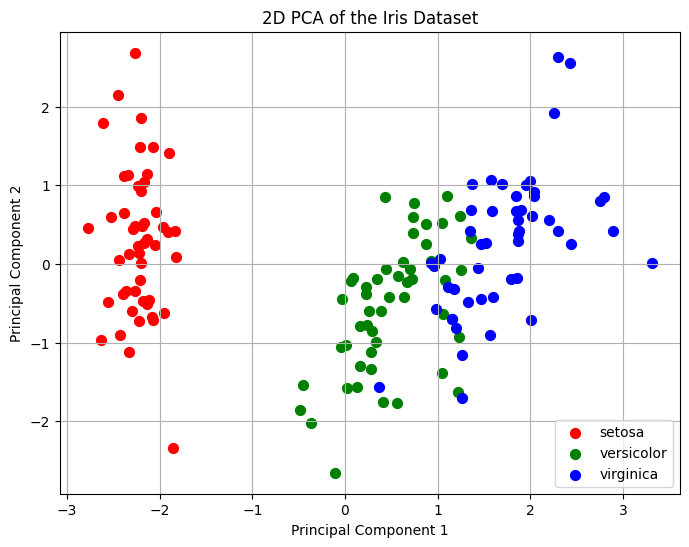

Cumulative explained variance for all principal components:
[0.72962445 0.95813207 0.99482129 1.        ]


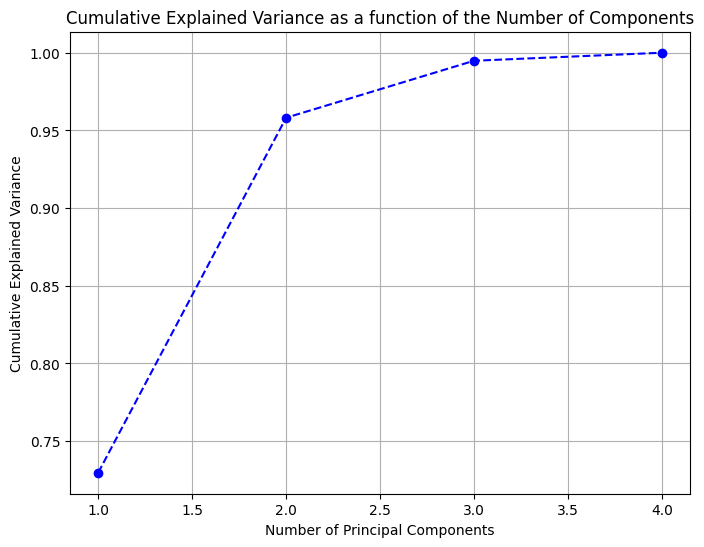

In [ ]:
# 1. Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# 1. Load the Iris Dataset
# The iris dataset contains 150 samples, with 4 features and 3 classes of flowers
iris = load_iris()
# iris.data # features: Sepal Length, Sepal width, Petal Length, Petal width
X = iris.data
# iris.target # Target: Species (Setosa, Versicolor, Virginica)
y = iris.target

# Convert to DataFrame for better visualization and handling
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['species'] = iris.target_names[y]

print("First few rows of the dataset:")
print(df.head())

# 2. Standardize the Data
# PCA is sensitive to the scale of the features, so we need to standardize the data.
# StandardScaler will normalize the features to have mean 0 and standard deviation 1.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA for Dimensionality Reduction
# We reduce the dimensionality to 2 components for easy visualization.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame containing the two principal components and the species Label
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['species'] = iris.target_names[y]

print("First few rows after PCA transformation:")
print(df_pca.head())

# 4. Explained Variance Ratio
# This tells us how much variance each principal component captures from the original data.
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance by each principal component: {explained_variance_ratio}")
print(f"Total variance explained by the two components: {sum(explained_variance_ratio)}")

# 5. Visualize the PCA result
# We will plot the two principal components (PC1 and PC2) to see how well PCA separated the classes.
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
species = ['setosa', 'versicolor', 'virginica']

# Plot each class with different colors
for i, species_name in enumerate(species):
    subset = df_pca[df_pca['species'] == species_name]
    plt.scatter(subset['PC1'], subset['PC2'], label=species_name, c=colors[i], s=50)

# Add Labels and Legend
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of the Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()

# 6. Cumulative Explained Variance
# Cumulative explained variance tells us how much of the original variance we retain
# as we keep adding more components.
pca_full = PCA(n_components=X.shape[1]) # Keep all components to see the cumulative effect
pca_full.fit(X_scaled)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
print("Cumulative explained variance for all principal components:")
print(cumulative_variance)
# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, X.shape[1] + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance as a function of the Number of Components')
plt.grid(True)
plt.show()